In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%load_ext watermark
%watermark -a "author: eljirg" -u -n -t -z

author: eljirg 
last updated: Tue Feb 19 2019 09:34:31 Tokyo Standard Time


# Data Stacking with Padding

Often time we are faced with cases that needs us to be able to stack data together so they will be correctly processed. One case that is on image. Let's say that you have a 3d sensor data of roads and you wanted to process it chunk by chunk (since working on an entire road could be problematic). You then work upon in one by one, however he problem arise when each section is actually carries some variances (depth, length, width can differ) to counter this you need some code that can help you make the size similar

## Imports

In [2]:
%matplotlib inline

import os, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
def numpy_fillna_2d(data):
    """
    This code is used to fill dissimilar sized array with zero so it can be stacked
    """
    # Get max shape of each array of data
    vertical_shape = max(np.array([i.shape[0] for i in data]))
    horizontal_shape = max(np.array([i.shape[1] for i in data]))
    
    result_list = []
    # Mask of valid places in each array
    for i in data:
        result = np.zeros((vertical_shape,horizontal_shape))
        result[:i.shape[0],:i.shape[1]] = i
        result_list.append(result)
    return result_list

## Single Depth

In [47]:
image_dict = {'section_1': ([np.random.random((96,96)) if a < 3 else np.random.random((80,96)) for a in range(5)]),
              'section_2': ([np.random.random((96,96)) for _ in range(5)]),
              'section_3': ([np.random.random((96,96)) for _ in range(5)]),
              'section_4': ([np.random.random((96,96)) for _ in range(5)])}

In [48]:
# combine images horizontally and vertically

"""
Note:
- sectioned_data = dictionary | keys: section name (splitted by same length by default))
                                values: path name of image after splitted further (row)
- image_dict = dictionary | keys: section name (splitted by same length by default))
                            values: list of data from corresponding section's splitted row
                            
The code below combine each section row's data with vstack and then further combine each section with hstack.
Some mofification are also made in the previous lines of code to accomodate this part.
"""

image_d1 = []

for i in image_dict:
    # stacking vertically
    image_d1_ = image_dict[i]
    image_d1.append(np.vstack(image_d1_))

    
# stacking horizontally
image_d1 = np.hstack(numpy_fillna_2d(image_d1))

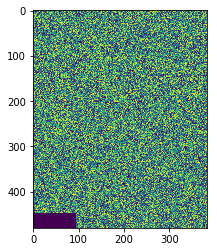

In [51]:
plt.imshow(image_d1)

Image with different size will be padded with zero here (you can't stack if there are **different sizes**)

## Multiple Depth at the same time

In [68]:
image_dict = {'section_1': ([[np.random.random((96,96)) if a < 3 else np.random.random((80,96)) for a in range(5)] for _ in range(4)]),
              'section_2': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_3': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_5': ([[np.random.random((96,96)) for _ in range(1)] for _ in range(4)]),
              'section_6': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_7': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_8': ([[np.random.random((96,96)) for _ in range(4)] for _ in range(4)]),
              'section_9': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_10': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_11': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),
              'section_12': ([[np.random.random((96,96)) for _ in range(5)] for _ in range(4)]),}

In [69]:
# combine images horizontally and vertically

"""
Note:
- sectioned_data = dictionary | keys: section name (splitted by same length by default))
                                values: path name of image after splitted further (row)
- image_dict = dictionary | keys: section name (splitted by same length by default))
                            values: list of data from corresponding section's splitted row
                            
The code below combine each section row's data with vstack and then further combine each section with hstack.
Some mofification are also made in the previous lines of code to accomodate this part.
"""

image_d1 = []
image_d2 = []
image_d3 = []
image_pred = []

for i in image_dict:
    # stacking vertically
    image_d1_, image_d2_, image_d3_, image_pred_ = image_dict[i]
    image_d1.append(np.vstack(image_d1_))
    image_d2.append(np.vstack(image_d2_))
    image_d3.append(np.vstack(image_d3_))
    image_pred.append(np.vstack(image_pred_))
    
# stacking horizontally
image_d1 = np.hstack(numpy_fillna_2d(image_d1))
image_d2 = np.hstack(numpy_fillna_2d(image_d2))
image_d3 = np.hstack(numpy_fillna_2d(image_d3))
image_pred = np.hstack(numpy_fillna_2d(image_pred))

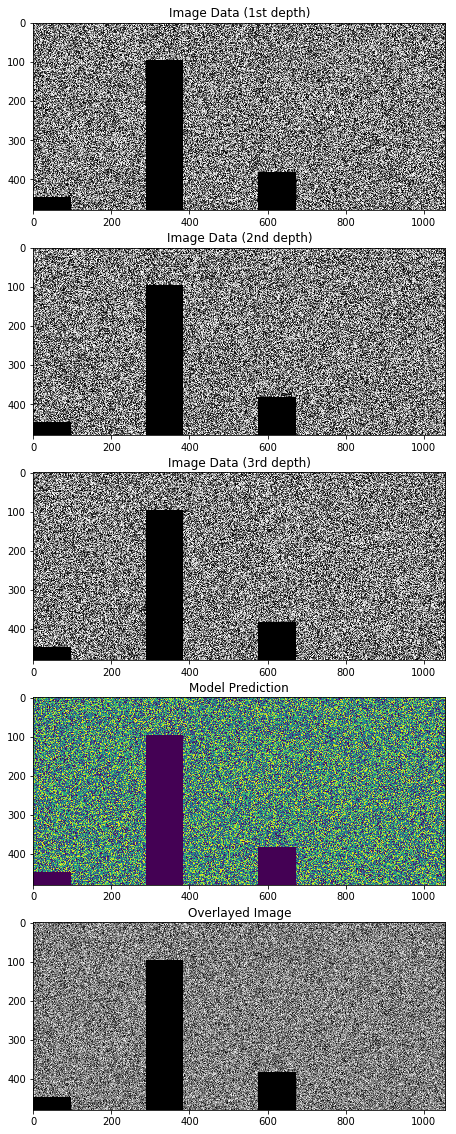

In [70]:
# plot final images
plt.rcParams.update({'font.size': 10})

# visualise the prediction result
fig=plt.figure(figsize=(40, 20))

fig.add_subplot(5, 1, 1)
plt.title('Image Data (1st depth)')
plt.imshow(image_d1, cmap="gray")

fig.add_subplot(5, 1, 2)
plt.title('Image Data (2nd depth)')
plt.imshow(image_d2, cmap="gray")

fig.add_subplot(5, 1, 3)
plt.title('Image Data (3rd depth)')
plt.imshow(image_d3, cmap="gray")

fig.add_subplot(5, 1, 4)
plt.title('Model Prediction')
plt.imshow(image_pred)

fig.add_subplot(5, 1, 5)
plt.title('Overlayed Image')
plt.imshow(image_d1, cmap="gray", interpolation='none')
plt.imshow(image_pred, cmap="gray", interpolation='none', alpha=0.5)